## Mean Shift

KDE(Kernel Density Estimation)을 이용하여 개별 datapoint들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행하는 모델
> K-means는 K(군집 수)를 직접 설정하고 군집 내 평균 거리를 기반으로 중심 설정

1. step 1: 개별 datapoint의 특정 반경(bandwidth) 내에서 데이터 분포도 계산
2. step 2: KDE 함수를 사용해 밀도가 가장 높은 곳을 찾아 datapoint 위치 이동
3. step 3: 새로운 datapoint 위치 업데이트
4. step 4: 더 이상 업데이트 되지 않을 때까지 1~3번 반복


- 대표적인 kernel 함수로 가우시안 분포 함수 사용
<img src="KDE.PNG" alt='KDE' width="70%" height="70%">

    - $$x_i$$: datapoint, h: bandwidth, x: 확률 변수값
    - h가 작을수록 오버피팅, h가 클수록 언더피팅 발생

<img src="graph.PNG" alt='graph' width="60%" height="60%">

### 1. sample data

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

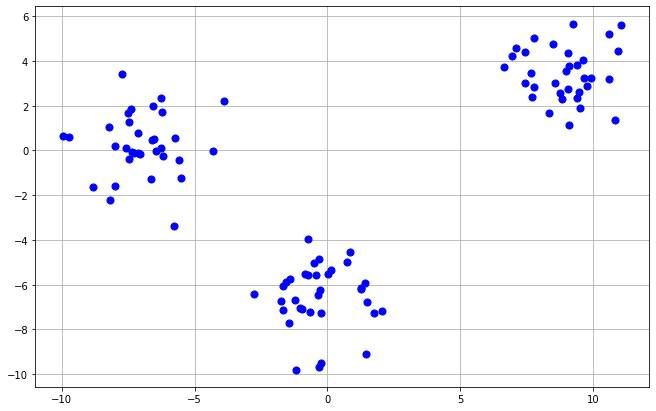

In [2]:
## 샘플 데이터 1
x = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11],
              [8, 2],
              [10, 2],
              [9, 3]])

## 샘플 데이터 2
X = np.array([[ 9.41309256e+00,  3.80126631e+00],
              [-9.72251477e+00,  6.01161199e-01],
              [ 1.28294440e+00, -6.13705649e+00],
              [-7.36210444e+00, -7.46120098e-02],
              [-9.53978128e-01, -7.08256146e+00],
              [ 9.08493312e+00,  1.12415408e+00],
              [-6.24180450e+00,  1.73487169e+00],
              [ 9.64751418e+00,  3.23661748e+00],
              [-2.49872427e-01, -7.26371360e+00],
              [ 9.60337561e+00,  4.05083377e+00],
              [ 7.68921558e+00,  2.37456066e+00],
              [ 1.10601118e+01,  5.61542998e+00],
              [ 9.07529629e+00,  4.33220215e+00],
              [-6.25343429e+00,  2.34014121e+00],
              [-7.45325139e+00, -4.00431927e-01],
              [ 1.09320552e+01,  4.45298162e+00],
              [ 8.45384120e-01, -4.56183361e+00],
              [-2.77839499e-01, -6.23554691e+00],
              [ 1.06025886e+01,  5.21518542e+00],
              [ 8.97599410e+00,  3.54981980e+00],
              [ 9.51249732e+00,  1.89380503e+00],
              [ 9.24504941e+00,  5.66818056e+00],
              [-2.54635001e-01, -9.49681222e+00],
              [ 8.55856670e+00,  3.03174308e+00],
              [-6.57840350e+00,  2.00198112e+00],
              [-1.39001965e+00, -5.75601009e+00],
              [ 9.93093341e+00,  3.24261512e+00],
              [ 7.09170043e+00,  4.59778040e+00],
              [ 9.07823593e+00,  3.76857855e+00],
              [-1.03670704e+00, -7.04702517e+00],
              [-8.83140502e+00, -1.62297239e+00],
              [-5.75105929e+00,  5.43795708e-01],
              [-8.17580079e+00, -2.21380813e+00],
              [-7.74259936e+00,  3.42862577e+00],
              [-1.18441916e+00, -9.79600471e+00],
              [-6.59620414e+00,  4.60836614e-01],
              [ 1.43947496e+00, -9.10417644e+00],
              [ 7.33747743e-01, -4.98783826e+00],
              [-3.88957413e+00,  2.18638948e+00],
              [ 8.35712674e+00,  1.67297782e+00],
              [-7.27449177e+00, -1.22906685e-01],
              [-1.54210637e+00, -5.90122360e+00],
              [-8.33190440e-01, -5.53698826e+00],
              [-7.31213387e-01, -3.98180232e+00],
              [-5.16878500e-01, -5.04328039e+00],
              [-3.17901677e-01, -9.69168082e+00],
              [-1.43106154e+00, -7.73903528e+00],
              [-2.75851072e+00, -6.42686140e+00],
              [ 1.24942235e+00, -6.21471577e+00],
              [ 7.76760731e+00,  2.83809619e+00],
              [-7.14689608e+00, -1.32839469e-01],
              [-7.56738437e+00,  9.32614082e-02],
              [-5.56853520e+00, -4.17869905e-01],
              [-7.39958712e+00,  1.82936757e+00],
              [-7.20683486e-01, -5.56204122e+00],
              [ 8.84459272e+00,  2.30604507e+00],
              [-6.18418520e+00, -2.47904360e-01],
              [-5.76545756e+00, -3.40143104e+00],
              [ 9.45623662e+00,  2.59433227e+00],
              [ 1.43366627e+00, -5.94458017e+00],
              [ 1.64568653e-02, -5.52894081e+00],
              [ 7.76553674e+00,  5.03763845e+00],
              [ 1.74771948e+00, -7.25921982e+00],
              [ 7.45347260e+00,  3.00798374e+00],
              [-9.94310686e+00,  6.49300937e-01],
              [-6.54214971e+00,  4.93562299e-01],
              [ 9.78392282e+00,  2.86524719e+00],
              [-1.21329752e+00, -6.70851618e+00],
              [-1.74762115e+00, -6.75476968e+00],
              [-4.29262955e+00, -1.45348354e-02],
              [ 7.67048231e+00,  3.44131219e+00],
              [-3.51747196e-01, -6.46297393e+00],
              [-7.50524418e+00,  1.67657157e+00],
              [ 9.06386095e+00,  2.75047286e+00],
              [-7.98292742e+00,  2.17432965e-01],
              [ 6.95680322e+00,  4.22519308e+00],
              [-4.10382836e-01, -5.56556013e+00],
              [-7.13367640e+00,  7.66574094e-01],
              [-6.45828016e+00, -6.43032887e-03],
              [ 8.76491560e+00,  2.56871402e+00],
              [ 7.42738648e+00,  4.40369390e+00],
              [-1.66560772e+00, -6.05497326e+00],
              [ 6.64262299e+00,  3.71237541e+00],
              [ 1.45265876e-01, -5.35044353e+00],
              [-7.06080554e+00, -1.53513406e-01],
              [-5.49955532e+00, -1.21579504e+00],
              [ 1.08265066e+01,  1.37944768e+00],
              [ 8.48588654e+00,  4.76975931e+00],
              [-1.65960546e+00, -7.15711556e+00],
              [-6.63193265e+00, -1.27492914e+00],
              [ 1.05963520e+01,  3.18067923e+00],
              [-3.02235898e-01, -4.84042949e+00],
              [-7.98679354e+00, -1.57311103e+00],
              [-6.70477540e-01, -7.21958439e+00],
              [ 9.40053270e+00,  2.36020591e+00],
              [-8.20727095e+00,  1.03064246e+00],
              [ 1.50043798e+00, -6.77548889e+00],
              [-7.48401892e+00,  1.24652547e+00],
              [-6.26635360e+00,  1.05071186e-01],
              [ 2.05521077e+00, -7.16728506e+00]])

plt.figure(figsize=(11,7))
plt.scatter(X[:,0], X[:,1], color='b', s=50, zorder=2)
plt.grid()
plt.show()

### 2. Mean shift

In [3]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a-b) ** 2))

def gaussian_kernel(distance, sigma):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((distance / sigma))**2)

def meanshift(data, bandwidth=4, n_iterations=50, epsilon=0.01):
    history = []
    history.append(data)

    # 초기값 설정
    prev_centroids = data.copy()
    centroids = data.copy()

    # 종료 조건 n_iterations 만큼 반복
    for i in range(n_iterations):
        print('iteration: ', i)

        # 현재 중심점과의 거리가 bandwidth 내에 있는 datapoint들을 별도의 리스트에 저장
        for k, centroid in enumerate(centroids):
            in_bandwidth = []
            for point in data:
                if euclidean_distance(point, centroid) <= bandwidth:
                    in_bandwidth.append(point)

            numerator = 0 # 분자
            denominator = 0 # 분모
            for inpoint in in_bandwidth:
                distance = euclidean_distance(inpoint, centroid)
                weight = gaussian_kernel(distance, bandwidth)

                numerator += (weight * inpoint)
                denominator += weight
            new_centroid = numerator / denominator
            # 중심점 업데이트
            centroids[k] = new_centroid
        # 반복마다 군집 중심 정보 저장
        history.append(np.copy(centroids))

        # 종료조건 - 새 중심점과 이전 중심점과의 차이가 epsilon보다 작으면 stop
        if all(euclidean_distance(new, prev) < epsilon for new, prev in zip(centroids, prev_centroids)):
            break
    unique_centroids = np.unique(np.round(centroids, 1), axis=0)

    return unique_centroids, history

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


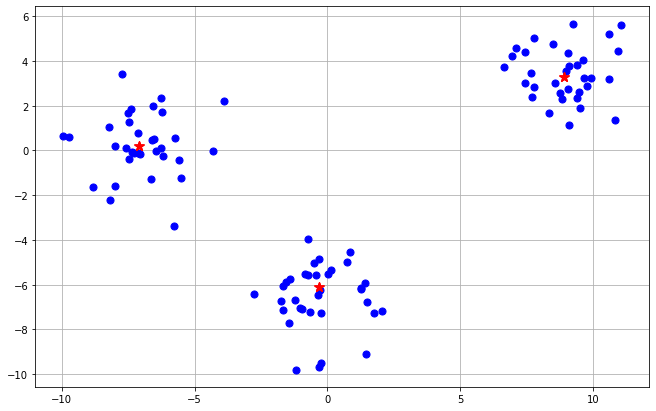

In [4]:
centroids, history = meanshift(X, bandwidth=3, n_iterations=10)

## 결과 그리기
plt.figure(figsize=(11,7))
plt.scatter(X[:,0], X[:,1], color='b', s=50, zorder=2)
for c in centroids:
    plt.scatter(centroids[:,0], centroids[:,1], color='r', marker='*',  s=100, zorder=2)
plt.grid()
plt.show()

### 3. Applications

#### 1) tracking

In [5]:
cap = cv2.VideoCapture('slow_traffic_small.mp4')
ret, frame = cap.read()

x, y, w, h = 310, 188, 41, 41
track_window = (x, y, w, h)
roi = frame[y:y+h, x:x+w]

# histogram backprojection
hsv_m =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_m, np.array([0,60,32]), np.array([180,255,255]))
hist_m = cv2.calcHist([hsv_m],[0], mask, [180], [0,180])
hist_m = (hist_m - hist_m.min()) / (hist_m.max() - hist_m.min())

# meanshift 종료 설정
term_crit = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 10, 1)

while 1:
    ret, frame = cap.read()
    if ret == False:
        break
    hsv_i = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject(images=[hsv_i],
                              channels=[0],
                              hist= hist_m,
                              ranges=[0, 180],
                              scale=1)
    ret, track_window = cv2.meanShift(probImage = dst,
                                      window=track_window,
                                      criteria=term_crit)

    x,y,w,h = track_window
    img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255, 2)
    cv2.imshow('tracking',img2)

    k = cv2.waitKey(0) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

#### 2) segmentation

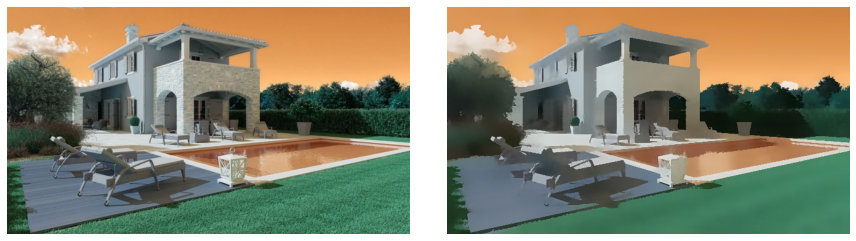

In [6]:
img = cv2.imread('villa.jpg')
luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)

shifted = cv2.pyrMeanShiftFiltering(src=luv,
                                    sp=11,
                                    sr=31)
shifted = cv2.cvtColor(shifted, cv2.COLOR_Luv2BGR)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(shifted)
plt.tight_layout()
plt.axis('off')
plt.show()

※ segmentation (watershed)

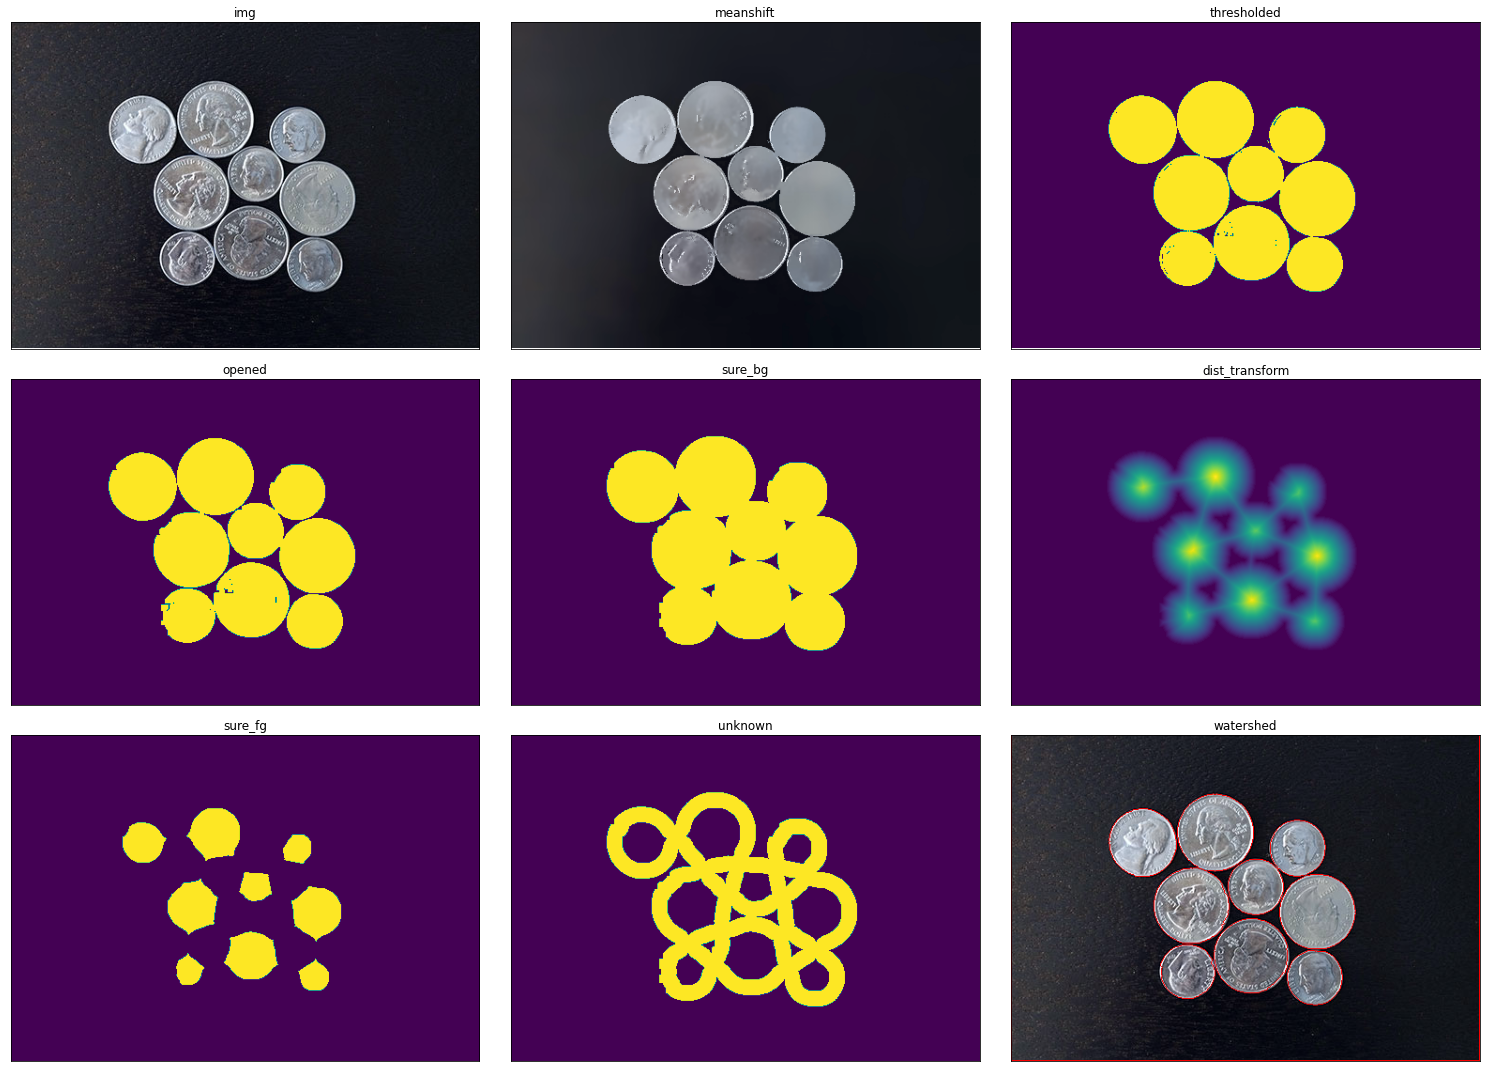

In [9]:
img = cv2.imread('coins.jpg')
luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)

shifted = cv2.pyrMeanShiftFiltering(src=luv,
                                    sp=11,
                                    sr=31)
# 오츄 이진화
shifted = cv2.cvtColor(shifted, cv2.COLOR_Luv2BGR)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 모폴로지 연산으로 노이즈 제거
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opened, kernel,iterations=2)

dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.4*dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

labels = cv2.watershed(img, markers)

result = img.copy()
result[labels == -1] = (255,0,0)

images = [img, shifted, thresholded,  opened, sure_bg, dist_transform, sure_fg, unknown, result]
titles = ['img','meanshift','thresholded','opened','sure_bg','dist_transform','sure_fg','unknown','watershed']

plt.figure(figsize=(21,15))
for i in range(len(images)):
    plt.subplot(3,3,i+1),
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.savefig('result.png')
plt.show()

